### Apartat B

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model, svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

import seaborn as sns

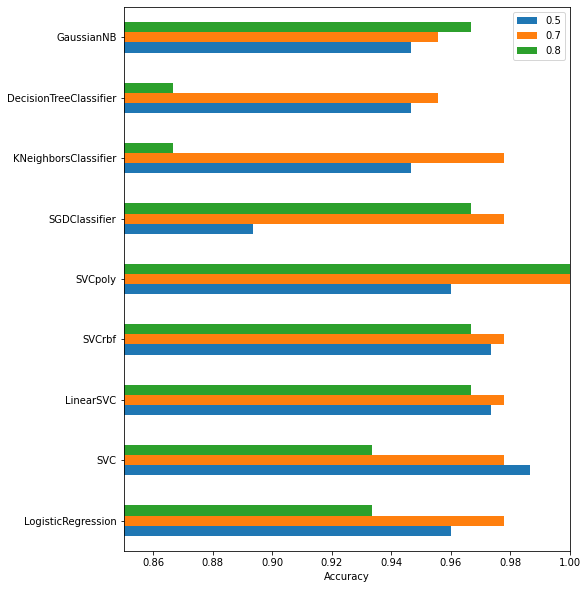

In [30]:
np.random.seed(1)

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'SVC': svm.SVC(kernel='linear', C=1.0),
    'LinearSVC': svm.LinearSVC(C=1.0, max_iter=1000000),
    'SVCrbf': svm.SVC(kernel='rbf', gamma=0.7, C=1.0),
    'SVCpoly': svm.SVC(kernel='poly', degree=3, gamma='auto', C=1.0),
    'SGDClassifier': linear_model.SGDClassifier(loss="modified_huber", alpha=0.1),
    'KNeighborsClassifier': neighbors.KNeighborsClassifier(n_neighbors=15),
    'DecisionTreeClassifier': tree.DecisionTreeClassifier(),
    'GaussianNB': naive_bayes.GaussianNB()
}

total_scores = {}

particions = [0.5, 0.7, 0.8]

for part in particions:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=part)
    scores = {}
    for model_name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        score = classifier.score(X_test, y_test)
        scores[model_name] = score
    total_scores[part] = scores

total_scores

pd.DataFrame(total_scores).plot.barh(figsize=(8, 10))
plt.xlim((0.85, 1))
plt.xlabel('Accuracy')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3c3f0e5-53b5-41aa-b55f-8ff8474beec2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>